## Classification control/tumor samples based on Fragments Per Kilobase Million (fpkm) values for each gene

Dell'Alma_Python_project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pwd

'/home/michela/Desktop/Magistrale BCG/Secondo semestre/Scientific programming/Python/Project_Python'

**Read** the files containing the **links** for the data (**samples and metadata**)

In [3]:
control = pd.read_table('Healthy.txt', sep='\t')
tumor = pd.read_table('Tumor.txt', sep='\t')

Convert into a list

In [4]:
array_contr = control.values
tumor_contr = tumor.values
contr_list = array_contr.tolist()
tumor_list = tumor_contr.tolist()

Convert into **flatten list** and **divide** into **sample** and **metadata**

In [5]:
contr_flat = [item for sublist in contr_list for item in sublist]
tumor_flat = [item for sublist in tumor_list for item in sublist]
contr_meta_flat = contr_flat[0::2]
contr_region_flat = contr_flat[1::2]
tumor_meta_flat = tumor_flat[0::2]
tumor_region_flat = tumor_flat[1::2] 

In [6]:
import urllib3

**Download** the **control samples**

In [7]:
#N=1
#http = urllib3.PoolManager()

#for url in contr_region_flat:
#            r = http.request('GET', url)
#            Name = str(N)
#            N += 1
#            with open("file_region_control"+ Name +".bed.gz", "wb") as fcont:
#                fcont.write(r.data)

Modify each file such that is transformed into a **pandas dataframe** with the columns of interest (**ensembl gene id, fpkm and class**), **merge** all the control samples dataframes on the ensembl_id

In [8]:
path='/home/michela/Desktop/Magistrale BCG/Secondo semestre/Scientific programming/Python/Project_Python'

First is taken a base table with all the ensembl gene id (60482) to which will be merged all the samples data

In [9]:
import os
pd_control1 = open('file_region_control1.bed.gz','r')
pd_conrol1 = pd_control1.readline()
colnames_arr = np.array(['chromosome','start','end','strand','ensembl_gene_id', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count', 'fpkm_uq', 'fpkm'])
control_old1 = pd.read_table(pd_control1, sep='\t', names=colnames_arr)
pd_control1 = pd.DataFrame(control_old1)
pd_control1 = pd_control1.drop(['chromosome','start','end','strand', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count','fpkm','fpkm_uq'], axis=1)
pd_control1['ensembl_gene_id'] = pd_control1['ensembl_gene_id'].astype('str')
pd_res1 = pd_control1.reset_index()
pd_control =pd_res1.drop(['index'], axis=1)
pd_control

,ensembl_gene_id
0,ENSG00000227232.5
1,ENSG00000278267.1
2,ENSG00000243485.3
3,ENSG00000274890.1
4,ENSG00000237613.2
...,...
60477,ENSGR0000270726.4
60478,ENSGR0000185203.10
60479,ENSGR0000182484.13
60480,ENSGR0000276543.3


In [10]:
import os
for filename in os.listdir(path):   
    if filename.startswith('file_region_control'):
        with open(filename) as f:
            f.readline()
            colnames_arr = np.array(['chromosome','start','end','strand','ensembl_gene_id', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count', 'fpkm_uq', 'fpkm'])
            control_old = pd.read_table(f, sep='\t', names=colnames_arr)
            f = pd.DataFrame(control_old)
            f = f.drop(['chromosome','start','end','strand', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count','fpkm_uq'], axis=1)
            f['ensembl_gene_id'] = f['ensembl_gene_id'].astype('str')
            f = f.reset_index()
            f = f.drop(['index'], axis=1)
        pd_control = pd_control.merge(f, how='left', on='ensembl_gene_id')

Set as **index** the **ensembl gene id** (needed such that with a transpose operation we are able to set the genes as columns), and convert all the **values** of the dataframe in **float** type

In [11]:
pd_control_ind = pd_control.set_index('ensembl_gene_id')
pd_control_ind = pd_control_ind.astype('float32')
pd_control_ind

,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,...,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232.5,0.138712,0.451213,1.149241,0.814096,0.149587,0.701657,0.692976,1.215935,0.332621,0.987355,...,0.299924,0.577433,0.413746,0.322127,0.433965,0.656461,0.222364,0.820666,0.4164,0.285601
ENSG00000278267.1,0.000000,0.000000,0.000000,0.000000,0.297194,0.774459,0.437073,0.000000,0.300382,0.478449,...,0.205476,0.839432,1.002458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
ENSG00000243485.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013353,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
ENSG00000274890.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000270726.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
ENSGR0000185203.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
ENSGR0000182484.13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [12]:
pd_control_trasp = pd_control_ind.T
pd_control_trasp

ensembl_gene_id,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000239945.1,...,ENSGR0000237040.4,ENSGR0000124333.13,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6
fpkm_x,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_y,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_x,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_y,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.061496,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_x,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.0,0.010848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fpkm_y,0.656461,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_x,0.222364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_y,0.820666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fpkm_x,0.416400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041650,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add **class column**, that for **control** is equal to **0**

In [13]:
pd_control_trasp['class'] =0
pd_control_trasp['class'] = pd_control_trasp['class'].astype('int')
pd_control_trasp

ensembl_gene_id,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000239945.1,...,ENSGR0000124333.13,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6,class
fpkm_x,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_y,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_x,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_y,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.061496,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_x,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.0,0.010848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fpkm_y,0.656461,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_x,0.222364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_y,0.820666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fpkm_x,0.416400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041650,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Set a **new index**

In [14]:
pd_control_res = pd_control_trasp.reset_index()
pd_control_res

ensembl_gene_id,index,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,...,ENSGR0000124333.13,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6,class
0,fpkm_x,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,fpkm_y,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,fpkm_x,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,fpkm_y,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.061496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,fpkm_x,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.0,0.010848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,fpkm_y,0.656461,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
108,fpkm_x,0.222364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
109,fpkm_y,0.820666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
110,fpkm_x,0.416400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
pd_control_index = pd_control_res.drop('index', axis=1)
pd_control_index

ensembl_gene_id,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000239945.1,...,ENSGR0000124333.13,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6,class
0,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.061496,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.0,0.010848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.656461,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
108,0.222364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
109,0.820666,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
110,0.416400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041650,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Download** the **tumor samples**, and **process** the data in the **same way** (as with control samples)

In [16]:
#N=1
#http = urllib3.PoolManager()

#for url in tumor_region_flat:
#            r = http.request('GET', url)
#            Name = str(N)
#            N += 1
#            with open("file_region_tumor"+ Name +".bed", "wb") as fcont:
#                fcont.write(r.data)

In [17]:
path='/home/michela/Desktop/Magistrale BCG/Secondo semestre/Scientific programming/Python/Project_Python'

Convert into dataframes take only the columns of interest and marge all the dataframes

Take an intial dataframe with only the genes' names, as initial table to merge (on the ensembl gene id) all the samples with a for loop

In [18]:
import os
pd_tumor1 = open('file_region_tumor1.bed','r')
colnames_arr = np.array(['chromosome','start','end','strand','ensembl_gene_id', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count', 'fpkm_uq', 'fpkm'])
tumor_old1 = pd.read_table(pd_tumor1, sep='\t', names=colnames_arr)
pd_tumor1 = pd.DataFrame(tumor_old1)
pd_tumor1 = pd_tumor1.drop(['chromosome','start','end','strand', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count','fpkm','fpkm_uq'], axis=1)
pd_tumor1['ensembl_gene_id'] = pd_tumor1['ensembl_gene_id'].astype('str')
pd_res1 = pd_tumor1.reset_index()
pd_tumor =pd_res1.drop(['index'], axis=1)
pd_tumor

,ensembl_gene_id
0,ENSG00000223972.5
1,ENSG00000227232.5
2,ENSG00000278267.1
3,ENSG00000243485.3
4,ENSG00000274890.1
...,...
60478,ENSGR0000270726.4
60479,ENSGR0000185203.10
60480,ENSGR0000182484.13
60481,ENSGR0000276543.3


In [19]:
import os
for filename in os.listdir(path):   
    if filename.startswith('file_region_tumor'):
        with open(filename) as f:
            colnames_arr = np.array(['chromosome','start','end','strand','ensembl_gene_id', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count', 'fpkm_uq', 'fpkm'])
            tumor_old = pd.read_table(f, sep='\t', names=colnames_arr)
            f = pd.DataFrame(tumor_old)
            f = f.drop(['chromosome','start','end','strand', 'entrez_gene_id', 'gene_symbol', 'type', 'htseq_count','fpkm_uq'], axis=1)
            f['ensembl_gene_id'] = f['ensembl_gene_id'].astype('str')
            #f = f[f['fpkm'] != 0.0]
            f = f.reset_index()
            f = f.drop(['index'], axis=1)
        pd_tumor = pd_tumor.merge(f, how='left', on='ensembl_gene_id') 

Set as index ensembl gene id's and convert dataframe's values into float

In [20]:
pd_tumor_ind = pd_tumor.set_index('ensembl_gene_id')
pd_tumor_ind = pd_tumor_ind.astype('float32')
pd_tumor_ind

,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,...,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm_x,fpkm_y,fpkm
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.008092,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014933,0.000000
ENSG00000227232.5,1.533114,0.601872,0.518822,1.688628,0.646047,0.172127,0.27337,0.509234,0.238250,1.781198,...,0.580006,0.311816,1.385960,0.512210,1.293218,0.366293,0.820235,0.259675,1.323234,6.857044
ENSG00000278267.1,2.000980,0.000000,0.000000,0.599091,0.435099,0.526115,0.00000,0.412950,0.175314,0.000000,...,0.823096,0.206502,0.210197,1.233504,0.000000,0.000000,0.000000,0.000000,0.762016,1.681893
ENSG00000243485.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000274890.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000270726.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSGR0000185203.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSGR0000182484.13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Traspose the matrix such that on the columns there are ensembl gene id's

In [21]:
pd_tumor_trasp = pd_tumor_ind.T

Add column of the class, in the case of tumoral samples: class = 1

In [22]:
pd_tumor_trasp['class']=1
pd_tumor_trasp['class'] = pd_tumor_trasp['class'].astype('int')

Reset the index

In [23]:
pd_tumor_res = pd_tumor_trasp.reset_index()
pd_tumor_index = pd_tumor_res.drop('index', axis=1)
pd_tumor_index

ensembl_gene_id,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,...,ENSGR0000124333.13,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6,class
0,0.000000,1.533114,2.000980,0.0,0.0,0.012402,0.0,0.0,0.0,0.085209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.601872,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.518822,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,1.688628,0.599091,0.0,0.0,0.000000,0.0,0.0,0.0,0.005467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.646047,0.435099,0.0,0.0,0.000000,0.0,0.0,0.0,0.011911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.000000,0.366293,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1087,0.000000,0.820235,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.014162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1088,0.000000,0.259675,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.003621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1089,0.014933,1.323234,0.762016,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**Concatenate** the **two tables**

In [24]:
unique_mat = pd.concat((pd_control_index, pd_tumor_index), axis=0, ignore_index=True)
unique_mat.info()
unique_mat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 60484 entries, ENSG00000227232.5 to ENSG00000223972.5
dtypes: float32(60483), int64(1)
memory usage: 277.6 MB


,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000274890.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000239945.1,...,ENSGR0000228410.4,ENSGR0000223484.5,ENSGR0000124334.15,ENSGR0000270726.4,ENSGR0000185203.10,ENSGR0000182484.13,ENSGR0000276543.3,ENSGR0000227159.6,class,ENSG00000223972.5
0,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
2,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.061496,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
4,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.0,0.010848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


### Exploratory data analysis

**Search** if there are **missing values**, if there are maybe it's better to build a predictive model to fill this values

In [25]:
np.any(unique_mat.isna(), axis=1).sum()

112

What are the columns that have **missing values**?

In [26]:
null_columns=unique_mat.columns[unique_mat.isnull().any()]
unique_mat[null_columns].isnull().sum()

ENSG00000223972.5    112
dtype: int64

From the output we see that the **ENSG00000223972.5** gene has 9.3% of missing values

Delete the genes that have **0 reads** for **all** the **rows**. Because not meaningful for the classification model, since for either the two classes we have a 0 value

In [27]:
unique_mat = unique_mat.loc[:, (unique_mat != 0).any(axis=0)]
unique_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Columns: 58270 entries, ENSG00000227232.5 to ENSG00000223972.5
dtypes: float32(58269), int64(1)
memory usage: 267.4 MB


In [28]:
unique_mat.shape
unique_mat.head()

,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000233750.3,ENSG00000268903.1,...,ENSG00000275510.1,ENSG00000277146.1,ENSG00000215506.5,ENSG00000224240.1,ENSG00000227629.1,ENSG00000237917.1,ENSG00000231514.1,ENSG00000235857.1,class,ENSG00000223972.5
0,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.003782,0.840102,...,0.0,0.0,0.0,0.0,0.000000,0.129535,0.0,0.0,0,NaN
1,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.013634,0.004442,0.201851,...,0.0,0.0,0.0,0.0,0.049512,0.326053,0.0,0.0,0,NaN
2,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.005819,1.145740,...,0.0,0.0,0.0,0.0,0.000000,0.085419,0.0,0.0,0,NaN
3,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.061496,0.006011,1.305002,...,0.0,0.0,0.0,0.0,0.000000,0.117655,0.0,0.0,0,NaN
4,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.010848,0.000000,0.562110,...,0.0,0.0,0.0,0.0,0.000000,0.164302,0.0,0.0,0,NaN


In [29]:
unique_mat.describe()

,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000233750.3,ENSG00000268903.1,...,ENSG00000275510.1,ENSG00000277146.1,ENSG00000215506.5,ENSG00000224240.1,ENSG00000227629.1,ENSG00000237917.1,ENSG00000231514.1,ENSG00000235857.1,class,ENSG00000223972.5
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,...,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1091.000000
mean,0.758826,0.373763,0.001166,0.000324,0.000594,0.001027,0.000254,0.016647,0.020174,1.811047,...,0.000099,0.001017,0.001239,0.000079,0.003169,0.075945,0.002419,0.022833,0.906899,0.003320
std,0.693963,0.543616,0.005108,0.002644,0.011190,0.017946,0.004125,0.039944,0.034338,2.155770,...,0.003439,0.028035,0.004510,0.001958,0.016018,0.090493,0.008993,0.175482,0.290694,0.023803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003264,0.415382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.557466,0.224059,0.000000,0.000000,0.000000,0.000000,0.000000,0.005013,0.010697,1.092725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.049370,0.000000,0.000000,1.000000,0.000000
75%,0.942681,0.526375,0.000000,0.000000,0.000000,0.000000,0.000000,0.013169,0.026103,2.354016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.123568,0.000000,0.000000,1.000000,0.000000
max,6.857044,4.595275,0.051765,0.046573,0.377512,0.562252,0.115145,0.603830,0.645798,22.783813,...,0.119278,0.952283,0.065859,0.053013,0.183944,0.582225,0.113796,4.148100,1.000000,0.721901


In [30]:
count_con_class = len(unique_mat[unique_mat['class']==0])
count_tum_class = len(unique_mat[unique_mat['class']==1])
count_con_class

112

In [31]:
pct_of_con_class = count_con_class/(count_con_class+count_tum_class)
print("percentage of control samples", pct_of_con_class*100)
pct_of_tum_class = count_tum_class/(count_con_class+count_tum_class)
print("percentage of tumor samples",pct_of_tum_class*100)

percentage of control samples 9.310058187863675
percentage of tumor samples 90.68994181213633


##### Imbalanced classes !
Ratio class 1 (contol) and class 2 (tumor) is about: **1:10** 

Since the data are very unbalanced we will apply **resampling methods**

##### Try to remove rows with missing values

In [32]:
np.any(unique_mat.isna(), axis=1).sum()

112

In [33]:
new_mat = unique_mat.dropna(axis=0, how='any')
new_mat = new_mat.reset_index()

In [34]:
count_con_class = len(new_mat[new_mat['class']==0])
count_tum_class = len(new_mat[new_mat['class']==1])

In [35]:
pct_of_con_class = count_con_class/(count_con_class+count_tum_class)
print("percentage of control samples", pct_of_con_class*100)
pct_of_tum_class = count_tum_class/(count_con_class+count_tum_class)
print("percentage of tumor samples",pct_of_tum_class*100)

percentage of control samples 0.0
percentage of tumor samples 100.0


If we remove the rows with missing values, we haven't samples from the control class, so all the **missing values** belongs to the control class.

So we delete the column of that gene (ENSG00000223972.5) beacuse not meaningful for the classification (since we have missing values for control class).

In [36]:
new_data = unique_mat.drop('ENSG00000223972.5', axis=1)
new_data

,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000233750.3,ENSG00000268903.1,...,ENSG00000188399.5,ENSG00000275510.1,ENSG00000277146.1,ENSG00000215506.5,ENSG00000224240.1,ENSG00000227629.1,ENSG00000237917.1,ENSG00000231514.1,ENSG00000235857.1,class
0,0.138712,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.003782,0.840102,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.129535,0.0,0.0,0
1,0.451213,0.000000,0.0,0.0,0.0,0.0,0.0,0.013634,0.004442,0.201851,...,0.0,0.0,0.0,0.0,0.0,0.049512,0.326053,0.0,0.0,0
2,1.149241,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.005819,1.145740,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.085419,0.0,0.0,0
3,0.814096,0.000000,0.0,0.0,0.0,0.0,0.0,0.061496,0.006011,1.305002,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.117655,0.0,0.0,0
4,0.149587,0.297194,0.0,0.0,0.0,0.0,0.0,0.010848,0.000000,0.562110,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.164302,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,0.366293,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.007636,0.308445,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.274031,0.0,0.0,1
1199,0.820235,0.000000,0.0,0.0,0.0,0.0,0.0,0.014162,0.013843,1.141569,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.120424,0.0,0.0,1
1200,0.259675,0.000000,0.0,0.0,0.0,0.0,0.0,0.003621,0.000000,0.142973,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.150116,0.0,0.0,1
1201,1.323234,0.762016,0.0,0.0,0.0,0.0,0.0,0.000000,0.040779,6.966138,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.177380,0.0,0.0,1


Problem of **unbalanced classes**. Solution by 
- resampling the data       
- use appropriate metrics for the evaluation of the alghoritms

**Resampling methods** = try to make the two classes almost equal in richness of data

In [37]:
from sklearn.utils import resample

df_majority = new_data[new_data['class']==1]
df_minority = new_data[new_data['class']==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=112,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['class'].value_counts()

1    112
0    112
Name: class, dtype: int64

Check that there is the correct number of samples

In [38]:
df_majority_downsampled['class'].value_counts()

1    112
Name: class, dtype: int64

In [39]:
df_majority_downsampled = df_majority_downsampled.reset_index()
df_majority_downsampled = df_majority_downsampled.drop('index', axis=1)

**Concatenate** the **two dataframes** belonging to the two different classes

In [40]:
df_downsam = pd.concat([df_majority_downsampled, df_minority], ignore_index=True)
df_downsam

,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.3,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.5,ENSG00000233750.3,ENSG00000268903.1,...,ENSG00000188399.5,ENSG00000275510.1,ENSG00000277146.1,ENSG00000215506.5,ENSG00000224240.1,ENSG00000227629.1,ENSG00000237917.1,ENSG00000231514.1,ENSG00000235857.1,class
0,0.493151,0.000000,0.0,0.0,0.024786,0.0,0.000000,0.000000,0.000000,0.137882,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.133634,0.000000,0.0,1
1,0.524886,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.017842,0.046506,9.832589,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.034625,0.0,1
2,0.584223,0.455182,0.0,0.0,0.018424,0.0,0.000000,0.074764,0.020299,2.459789,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.092711,0.000000,0.0,1
3,0.135310,0.316270,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.242125,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.188652,0.000000,0.0,1
4,0.330823,0.273861,0.0,0.0,0.000000,0.0,0.020286,0.000000,0.000000,0.419316,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.278900,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.656461,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.020680,0.939739,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.109632,0.000000,0.0,0
220,0.222364,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.007011,0.013706,0.363299,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0
221,0.820666,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.005015,0.050638,...,0.0,0.0,0.0,0.035731,0.0,0.0,0.073617,0.000000,0.0,0
222,0.416400,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.041650,0.005089,1.361749,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0


Remove eventual gene's columns that have only 0 values

In [41]:
unique_data = df_downsam.loc[:, (df_downsam != 0).any(axis=0)]
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Columns: 57739 entries, ENSG00000227232.5 to class
dtypes: float32(57738), int64(1)
memory usage: 49.3 MB


Now that we have preprocessed the data, we apply **clustering tecniques** to see if can be found any **patterns** in the data

We can try to have a **first idea** on how **samples** are **organized** by visualizing how they are distributed in the space. In order to do that (we can only visualize 3 dimensions) we have to reduce the number of features. 
We can use PCA to convert the original dataset features (58269) into 3 new features (NB: not a subset of the most important features, but new ones) and use them as coordinates of a 3D space.

In [44]:
from sklearn.decomposition import PCA
X = unique_data.drop('class', axis=1)
y=unique_data['class']
pca = PCA(n_components=3)
X = X.to_numpy()
X = X.reshape(-1,57738)
X_prj = pca.fit_transform(X)

In [45]:
y = np.array(y)
y = y.astype(int)
X = X.astype(float)

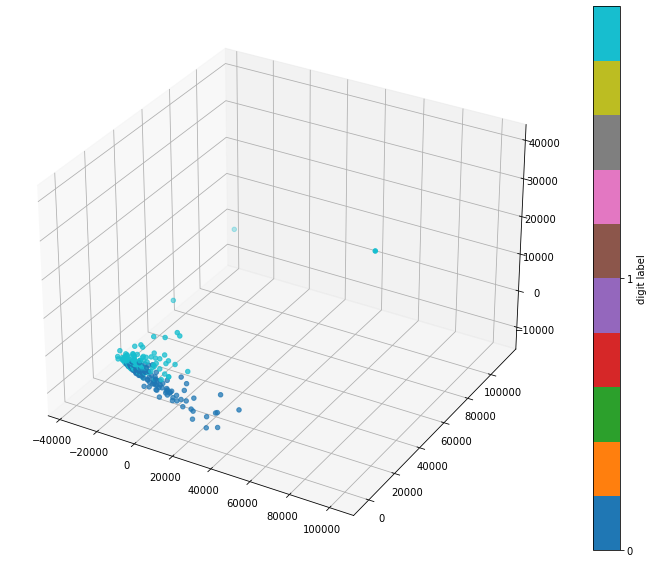

In [46]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
def plot3d(X, labels):
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    X = X.reshape(-1, 57738)
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    ax.scatter(xs=X_prj[:, 0], ys=X_prj[:, 1], zs=X_prj[:, 2], c=labels, cmap=cmap)
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(X, labels=y)

## Classification

As evaluation metrics for classification i have used **cross validated and test *accuracy* score** and other metrics for classifcation algorithms: ***sensitivity, specificity, precision, f1 score***.

The ***auc value*** has not been computed since the dataset has been resampled such that there is an equal proportion of data between the two classes, so there is no need for evaluation of algorithm performance with different classification tresholds.

### Feature selection (logistic regression with l1 penalty)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
split_seed = 42
split_test_size = 0.2
X_full = unique_data.drop('class', axis=1)
y=unique_data['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

Before training the logistic regression model with l1 penalty, it's advisable to **standardize** the **variables**

In [48]:
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_full_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_full_test)

Find the value of C for which the model is more accurate

In [49]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_full_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

C: 10
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 1.0
Test accuracy: 0.9777777777777777

C: 1
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 0.994413407821229
Test accuracy: 1.0

C: 0.1
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 0.9888268156424581
Test accuracy: 1.0

C: 0.001
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 0.994413407821229
Test accuracy: 0.9555555555555556



**Fit** the model

In [50]:
model = LogisticRegression(solver='liblinear', penalty='l1', C = 0.1, max_iter=10000)
model = model.fit(X_full_train,y_train)

Creation of the **new pandas dataframe** with the **features selected** with lasso logistic regression

In [51]:
unique_data.loc[0,:]

ENSG00000227232.5    0.493151
ENSG00000278267.1    0.000000
ENSG00000243485.3    0.000000
ENSG00000237613.2    0.000000
ENSG00000268020.3    0.024786
                       ...   
ENSG00000227629.1    0.000000
ENSG00000237917.1    0.133634
ENSG00000231514.1    0.000000
ENSG00000235857.1    0.000000
class                1.000000
Name: 0, Length: 57739, dtype: float64

From the model trained, access to the **coefficients values different from 0**, and extract them **indices**

In [52]:
list_coef = model.coef_.ravel()
pd_coef = pd.DataFrame(list_coef)
pd_main_feat = pd_coef[pd_coef != 0]
pd_main_feat = pd_main_feat.dropna()
index = pd_main_feat.index
indices = list(index)
indices.append(57738)
indices

[869,
 2184,
 2841,
 3081,
 3343,
 4794,
 6655,
 8062,
 8937,
 9642,
 10802,
 11135,
 11836,
 11962,
 11965,
 16938,
 16950,
 23191,
 23623,
 24467,
 25182,
 27884,
 29977,
 32111,
 35276,
 38410,
 39156,
 40248,
 40258,
 43819,
 44144,
 44681,
 46311,
 47055,
 47763,
 49347,
 50189,
 51300,
 51903,
 52847,
 55109,
 55111,
 55115,
 55121,
 55124,
 55125,
 55126,
 55127,
 55129,
 55139,
 55141,
 57385,
 57738]

Create a **new dataframe** with the coefficients selected by feature selection

In [53]:
new_pd_df = unique_data.iloc[:, indices] 

Now that we have the dataset with the features selected, we proceed with the **evaluation of the most performant classification algorithm**

### Logistic regression

In [54]:
split_seed = 42
split_test_size = 0.2
X_full = new_pd_df.drop('class', axis=1)
y=new_pd_df['class']
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [55]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver="newton-cg", penalty='none') 
#model.fit(X_full_train, y_train)   

In [56]:
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(model, X_full_train, y_train, cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [57]:
def sensitivity(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

def specificity(cm):
    TN = cm[0,0]
    N = cm[0,:].sum()
    return TN / N

def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

def f1(cm):
    p = precision(cm)
    r = sensitivity(cm)
    return (2 * p * r) / (p + r)

In [58]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#cm = confusion_matrix(y_test, model.predict(X_full_test))
#print("Sensitivity ", sensitivity(cm))
#print("Specificity ", specificity(cm))
#print("Precision ", precision(cm))
#print("F1-score", f1(cm))

We have obscured the output because logistic regression algorithm with the variable selected, does **not converge to a solution**, we try with different classification algorithms

### LDA

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
model = LDA(store_covariance=True)
model = model.fit(X_full_train, y_train)
scores = cross_val_score(model, X_full_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
test_acc = accuracy_score(model.predict(X_full_test), y_test)
print("LDA test accuracy:", test_acc)

Accuracy: 0.97 (+/- 0.07)
LDA test accuracy: 0.9777777777777777


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  0.9523809523809523
Specificity  1.0
Precision  1.0
F1-score 0.975609756097561


### LDA with polynomial features?

Find the correct value value for the degree hyperparameter with cross validation tecnique

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 4)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))
cv.fit(X_full_train, y_train)

In [ ]:
def show_results(cv, X_full_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    best_idx = np.argmax(results['mean_test_score'])
    plt.plot(results[params][best_idx], 
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test accuracy:", accuracy(y_test, cv.best_estimator_.predict(X_full_test)))

In [ ]:
show_results(cv, X_full_test, 'param_poly__degree')

The best degree is 1, with non linear boundaries the performance of the algorithm does not improve.

### QDA

If we do not take into account the assumption of equal covariance matrix in the two multivariate gaussian distributions, then we obtain a quadratic relationship.

In [61]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA(store_covariance=True)
model = model.fit(X_full_train, y_train)

In [62]:
scores = cross_val_score(model, X_full_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
test_acc = accuracy_score(model.predict(X_full_test), y_test)
print("QDA test accuracy:", test_acc)

Accuracy: 0.96 (+/- 0.10)
QDA test accuracy: 1.0


In [63]:
model = model.fit(X_full_train, y_train)
cm = confusion_matrix(y_test, model.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  1.0
Specificity  1.0
Precision  1.0
F1-score 1.0


## Support vector machine

### Linearly separable case (hard margins)

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear', C=np.inf)
model.fit(X_full_train, y_train)

train_acc = accuracy_score(model.predict(X_full_train), y_train)
test_acc = accuracy_score(model.predict(X_full_test), y_test)

print("SVM train accuracy:", train_acc)
print("SVM test accuracy:", test_acc)

scores = cross_val_score(model, X_full_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
test_acc = accuracy_score(model.predict(X_full_test), y_test)
print("QDA test accuracy:", test_acc)

SVM train accuracy: 1.0
SVM test accuracy: 0.9555555555555556
Accuracy: 0.98 (+/- 0.05)
QDA test accuracy: 0.9555555555555556


In [65]:
cm = confusion_matrix(y_test, model.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  1.0
Specificity  0.9166666666666666
Precision  0.9130434782608695
F1-score 0.9545454545454545


### Non linearly separable case (soft margins)

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear', C=1)
model.fit(X_full_train, y_train)

train_acc = accuracy_score(model.predict(X_full_train), y_train)
test_acc = accuracy_score(model.predict(X_full_test), y_test)

print("SVM train accuracy:", train_acc)
print("SVM test accuracy:", test_acc)

SVM train accuracy: 1.0
SVM test accuracy: 0.9555555555555556


In [67]:
scores = cross_val_score(model, X_full_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
test_acc = accuracy_score(model.predict(X_full_test), y_test)
print("SVM test accuracy:", test_acc)

Accuracy: 0.98 (+/- 0.03)
SVM test accuracy: 0.9555555555555556


In [68]:
model.fit(X_full_train, y_train)
cm = confusion_matrix(y_test, model.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  1.0
Specificity  0.9166666666666666
Precision  0.9130434782608695
F1-score 0.9545454545454545


#### Kernel trick

#### Grid search for the best kernel

In [69]:
from sklearn.model_selection import GridSearchCV

# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree':  [2,3,4,5]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=10, scoring='accuracy', refit=True)
svm_poly.fit(X_full_train, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=10, scoring='accuracy', refit=True)
rbf_poly.fit(X_full_train, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}

sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=10, scoring='accuracy', refit=True)
sigm_poly.fit(X_full_train, y_train)


GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

In [70]:
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_   
    scores = cross_val_score(m, X_full_train, y_train, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("cv score: {}".format(cv_score))
    test_acc = accuracy_score(m.predict(X_full_test), y_test)
    print("Test accuracy:", test_acc)
    
cv_score = svm_poly.best_score_
m = svm_poly.best_estimator_
cv_score
m

Accuracy: 0.99 (+/- 0.03)
cv score: 0.9944444444444445
Test accuracy: 0.9333333333333333
Accuracy: 0.51 (+/- 0.04)
cv score: 0.5084967320261438
Test accuracy: 0.4666666666666667
Accuracy: 0.51 (+/- 0.04)
cv score: 0.5084967320261438
Test accuracy: 0.4666666666666667


SVC(C=25.00075, coef0=5.0, degree=5, kernel='poly')

The polynomial kernel seems to have an optimal value of accuracy now we evaluate with the other metrics

In [71]:
svm_poly.fit(X_full_train, y_train)
cm = confusion_matrix(y_test, svm_poly.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  0.9523809523809523
Specificity  0.9166666666666666
Precision  0.9090909090909091
F1-score 0.9302325581395349


In [72]:
rbf_poly.fit(X_full_train, y_train)
cm = confusion_matrix(y_test, rbf_poly.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  1.0
Specificity  0.0
Precision  0.4666666666666667
F1-score 0.6363636363636364


In [73]:
sigm_poly.fit(X_full_train, y_train)
cm = confusion_matrix(y_test, sigm_poly.predict(X_full_test))
print("Sensitivity ", sensitivity(cm))
print("Specificity ", specificity(cm))
print("Precision ", precision(cm))
print("F1-score", f1(cm))

Sensitivity  1.0
Specificity  0.0
Precision  0.4666666666666667
F1-score 0.6363636363636364


### Summary comparison of the algorithms

| Alghoritms                 | Sensitivity  | Specificity | Precision | F1-Score   | Accuracy CV       | TestAcc 
|----------------------------|--------------|-------------|-----------|------------|-------------------|----------
| LDA                        |  0.9524      |    1.0000   |  1.0000   |  0.9756    |  0.97 (+/- 0.05)  |  0.9778  
| **QDA**                    |**1.0000**    |  **1.0000** |**1.0000** |**1.0000**  |**0.97 (+/- 0.07)**|**1.0000**
| SVM Hard margins           |  1.0000      |    0.9167   |  0.9130   |  0.9545    |  0.98 (+/- 0.07)  |  0.9556  
| SVM Soft margins           |  1.0000      |    0.9167   |  0.9130   |  0.9545    |  0.99 (+/- 0.03)  |  0.9556  
| SVM polynomial             |  1.0000      |    0.9167   |  0.9130   |  0.9545    |  0.98 (+/- 0.07)  |  0.9556  
| SVM radial basis           |  1.0000      |    0.0000   |  0.4667   |  0.6364    |  0.51 (+/- 0.04)  |  0.4667  
| SVM sigmoid                |  1.0000      |    0.0000   |  0.4667   |  0.6364    |  0.51 (+/- 0.04)  |  0.4667  

**QDA** is the most performant algorithm for this classification task

More complex boundaries like radial basis kernel or sigmoid, are not very performant in this case. Given that i have not try to apply also k-nearest neighbors, because we don't need more complex boundaries